In [1]:
# Importa las bibliotecas necesarias
!pip install shap
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.3 MB/s eta 0:00:00


In [2]:
def boxplots(X,y, columns):
  data = pd.concat([pd.DataFrame(y, columns=['target']), pd.DataFrame(X, columns=columns)], axis=1)

  num_features = X.shape[1]
  num_rows = num_features // 3 + 1

  fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
  fig.subplots_adjust(hspace=0.5)

  # Se recorre cada feature para generar su diagrama de caja respecto de la salida
  for i, feature in enumerate(data.columns[1:]):
      row = i // 3
      col = i % 3
      sns.boxplot(x='target', y=feature, data=data, ax=axes[row, col])
      axes[row, col].set_title(f'Diagrama de caja de {feature}')
      axes[row, col].set_xlabel('Target')
      axes[row, col].set_ylabel(feature)

  # Eliminar subplots vacíos si es necesario
  if num_features % 3 != 0:
      for i in range(num_features % 3, 3):
          fig.delaxes(axes[num_rows - 1, i])

  plt.show()


In [3]:
data = load_wine()
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [5]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [6]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [7]:
feature_names=df.drop('target',axis=1).columns.values
feature_names

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                    df['target'].values.reshape(-1,1),
                                                    test_size=0.2,
                                                    random_state=42)

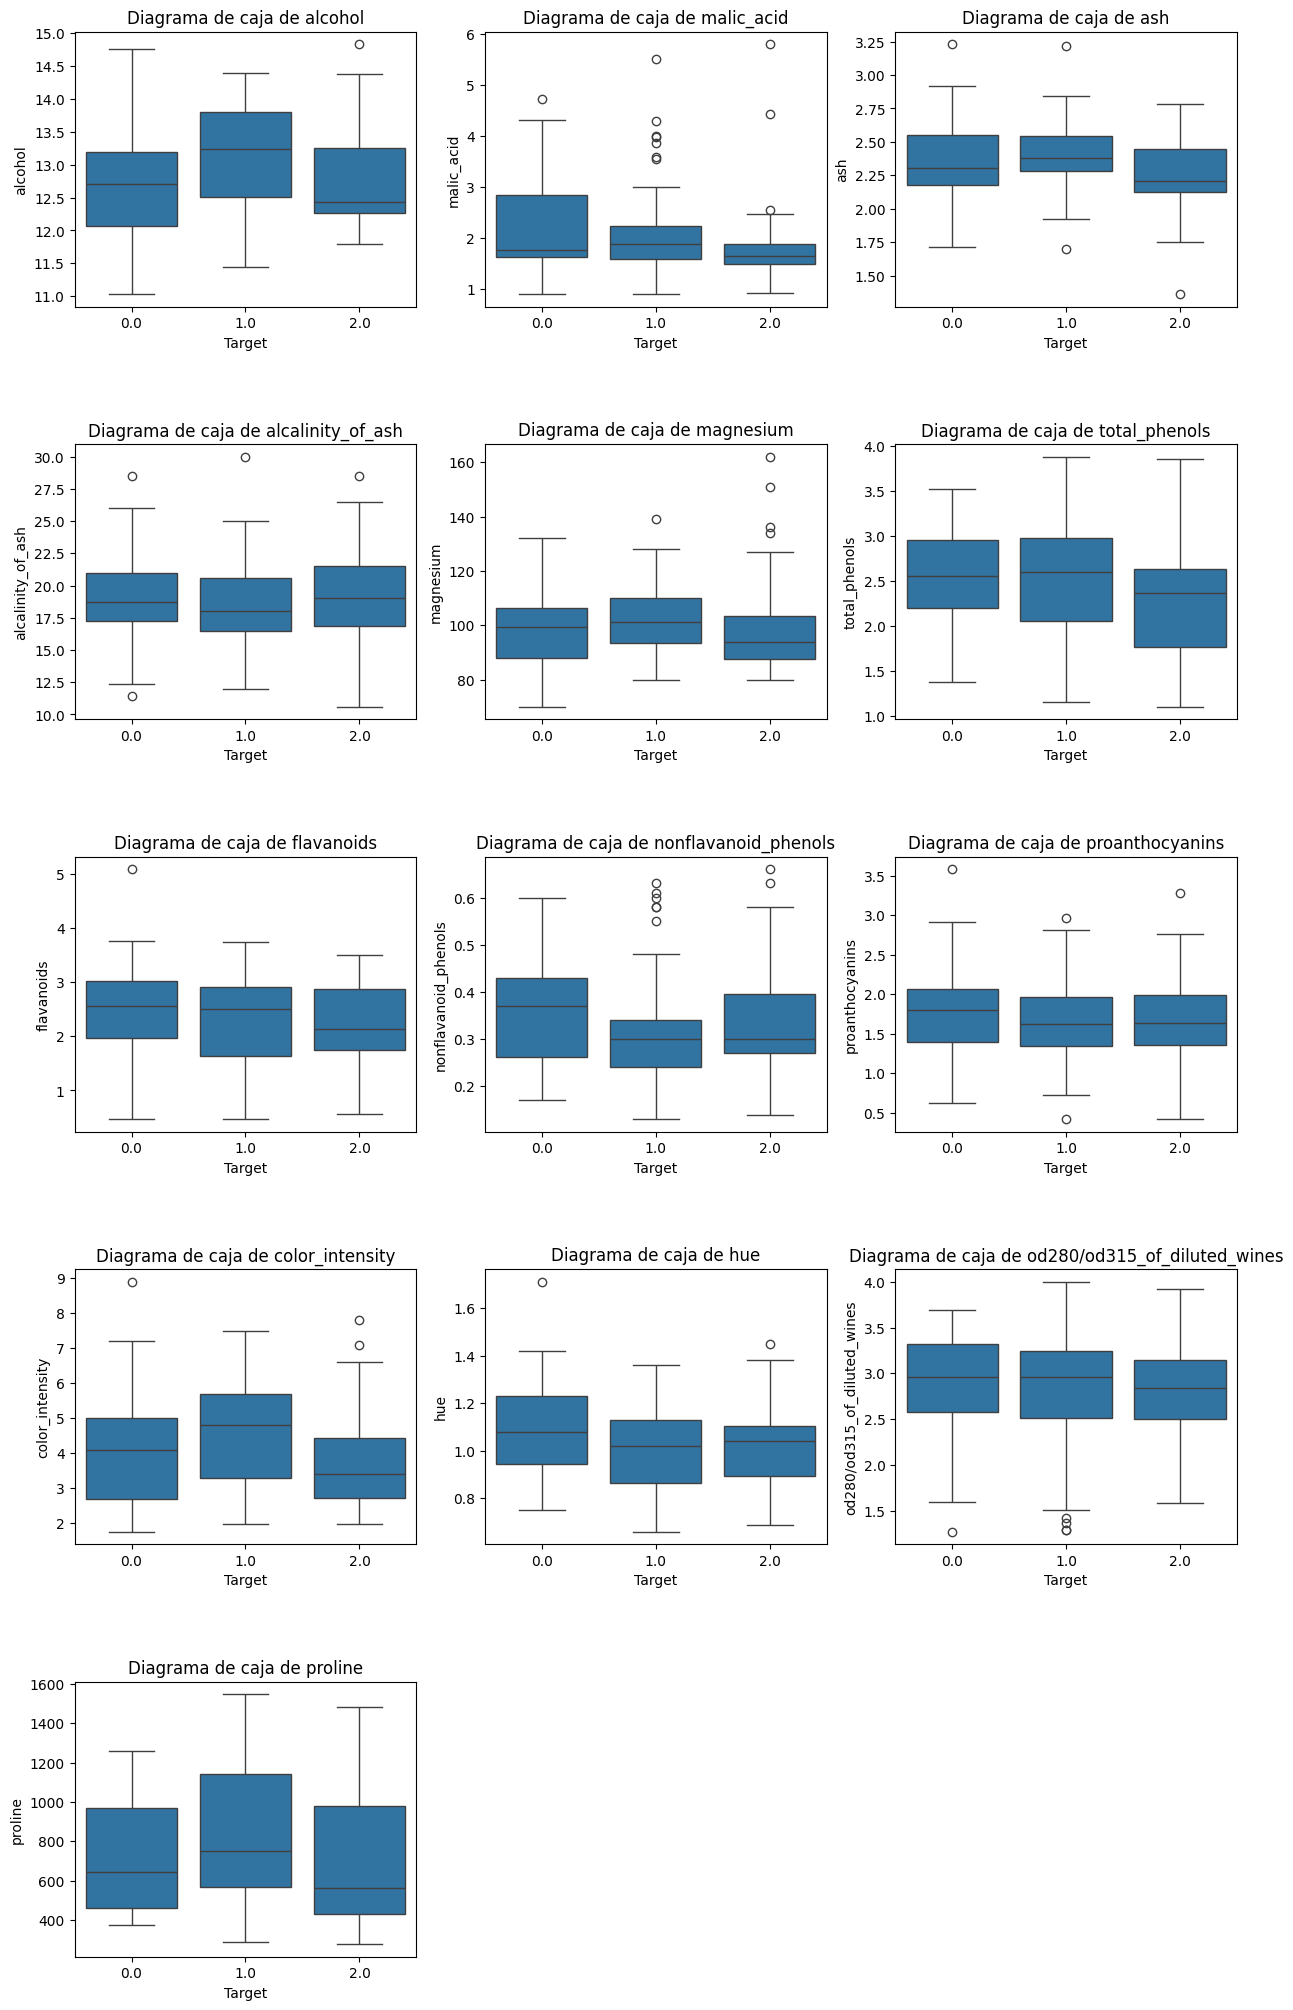

In [9]:
boxplots(X_train, y_train, feature_names)

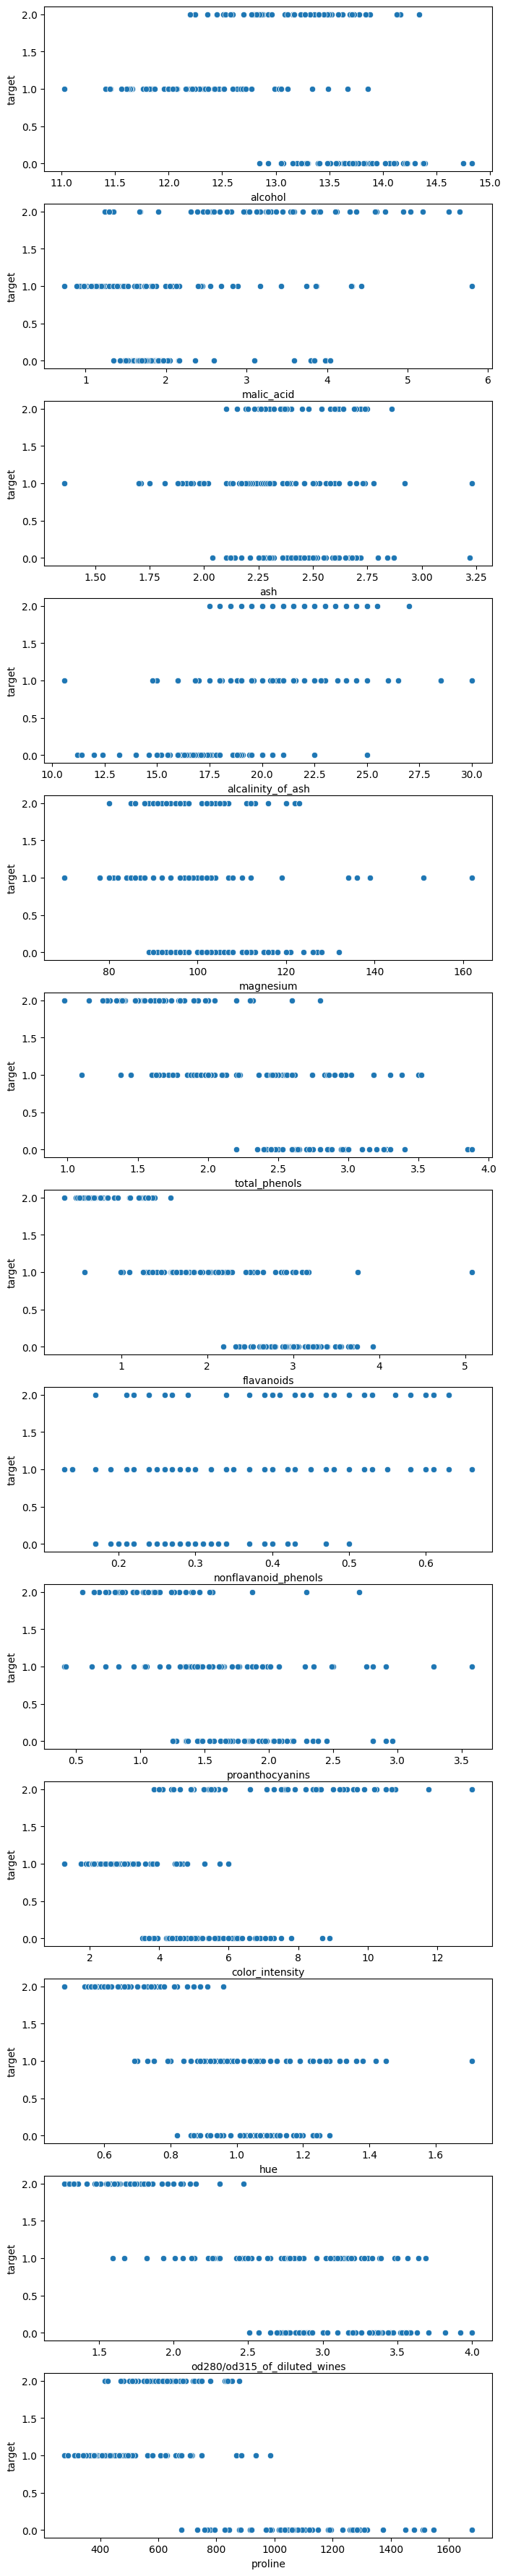

In [10]:
fig, ax = plt.subplots(len(feature_names),1,figsize=(8,3.5*len(feature_names)))
for i in range(len(feature_names)):
  sns.scatterplot(data=df, x=feature_names[i], y='target', ax=ax[i])
  ax[i].set_xlabel(feature_names[i])

In [11]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [13]:
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [14]:
df_coeficientes=pd.DataFrame(model.coef_.T, index=feature_names)

In [15]:
df_coeficientes

,0,1,2
alcohol,0.742900,-0.931269,0.188369
malic_acid,0.157474,-0.448990,0.291515
ash,0.499868,-0.821808,0.321939
alcalinity_of_ash,-0.833333,0.668980,0.164353
magnesium,0.042605,-0.039603,-0.003002
total_phenols,0.213315,0.011306,-0.224621
flavanoids,0.644740,0.325871,-0.970611
nonflavanoid_phenols,-0.158657,0.217628,-0.058970
proanthocyanins,0.188956,0.243008,-0.431964
color_intensity,0.183641,-1.008272,0.824631


<Axes: >

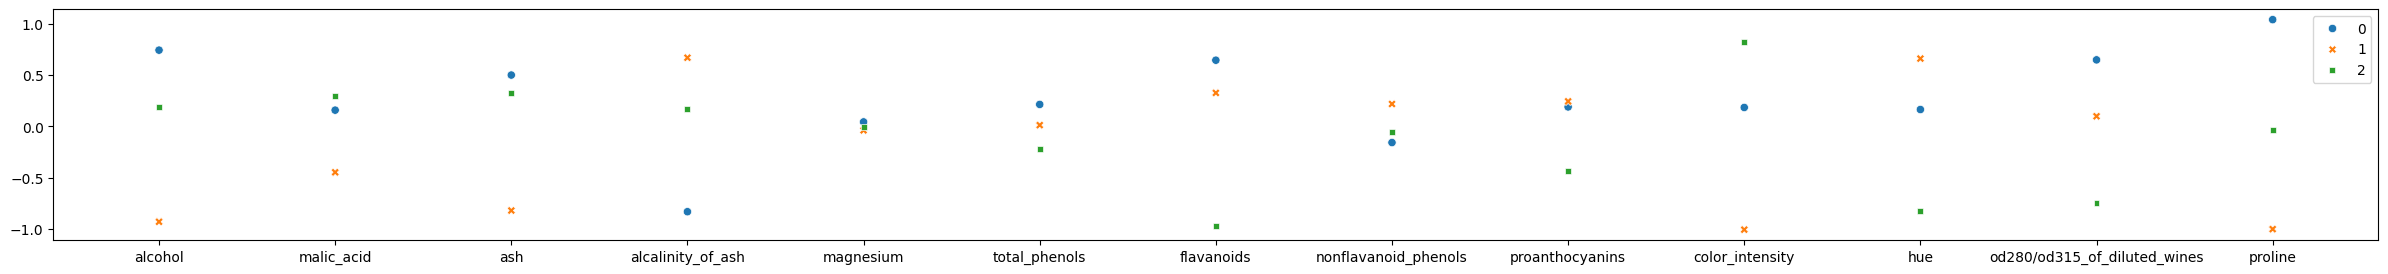

In [16]:
import seaborn as sns
fig, ax=plt.subplots(1,1,figsize=(30,3))
sns.scatterplot(data=df_coeficientes, ax=ax)

In [17]:
# Crea un objeto explainer SHAP
explainer = shap.Explainer(model, X_train_scaled, feature_names=feature_names)

In [18]:
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer(X_test_scaled)

In [19]:
shap_values.shape

(36, 13, 3)

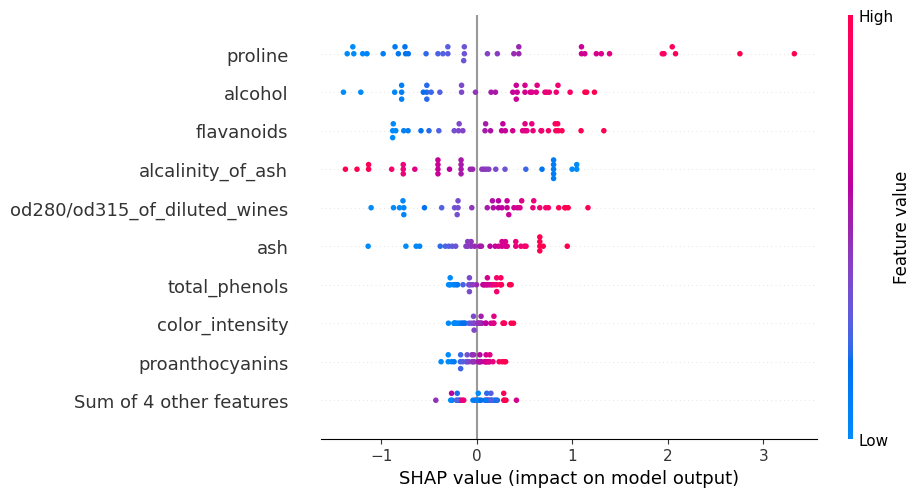

In [20]:
shap.plots.beeswarm(shap_values[:,:,0])

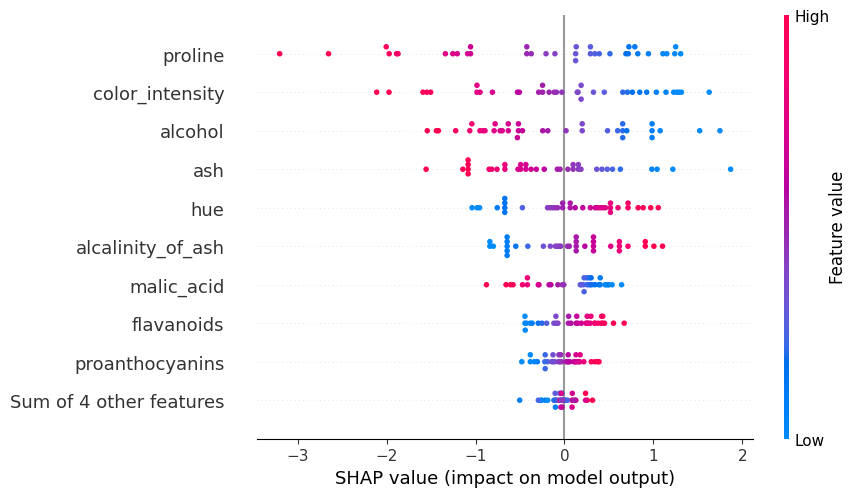

In [21]:
shap.plots.beeswarm(shap_values[:,:,1]);

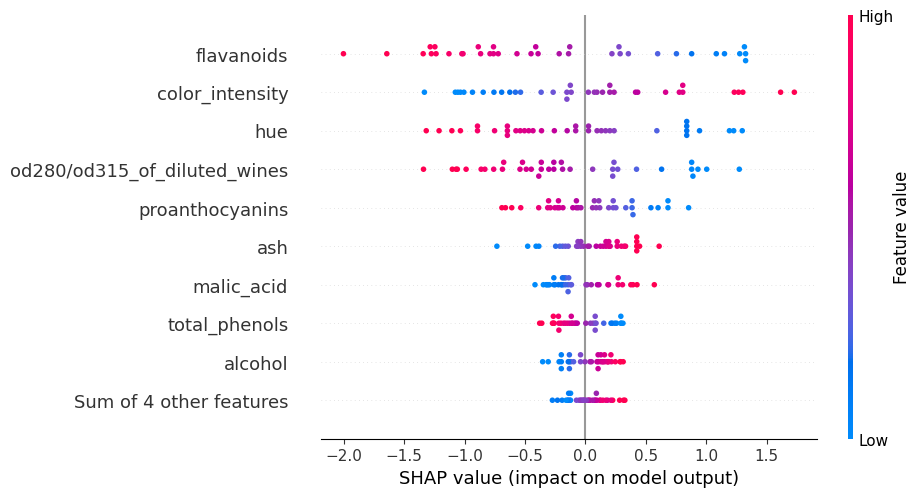

In [22]:
shap.plots.beeswarm(shap_values[:,:,2]);

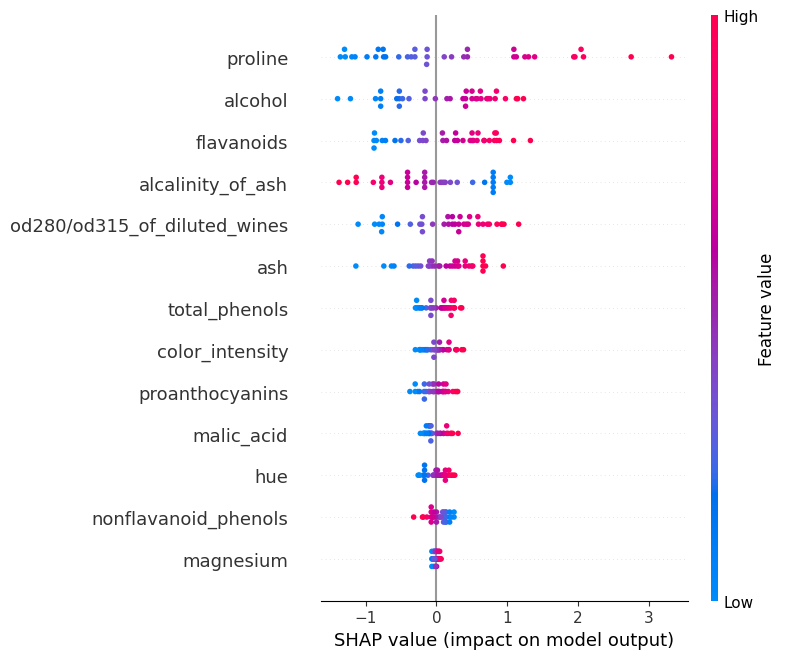

In [23]:
# Plotea un resumen de las explicaciones SHAP para las predicciones
shap.summary_plot(shap_values[:,:,0], X_test_scaled, feature_names=feature_names, show=False)

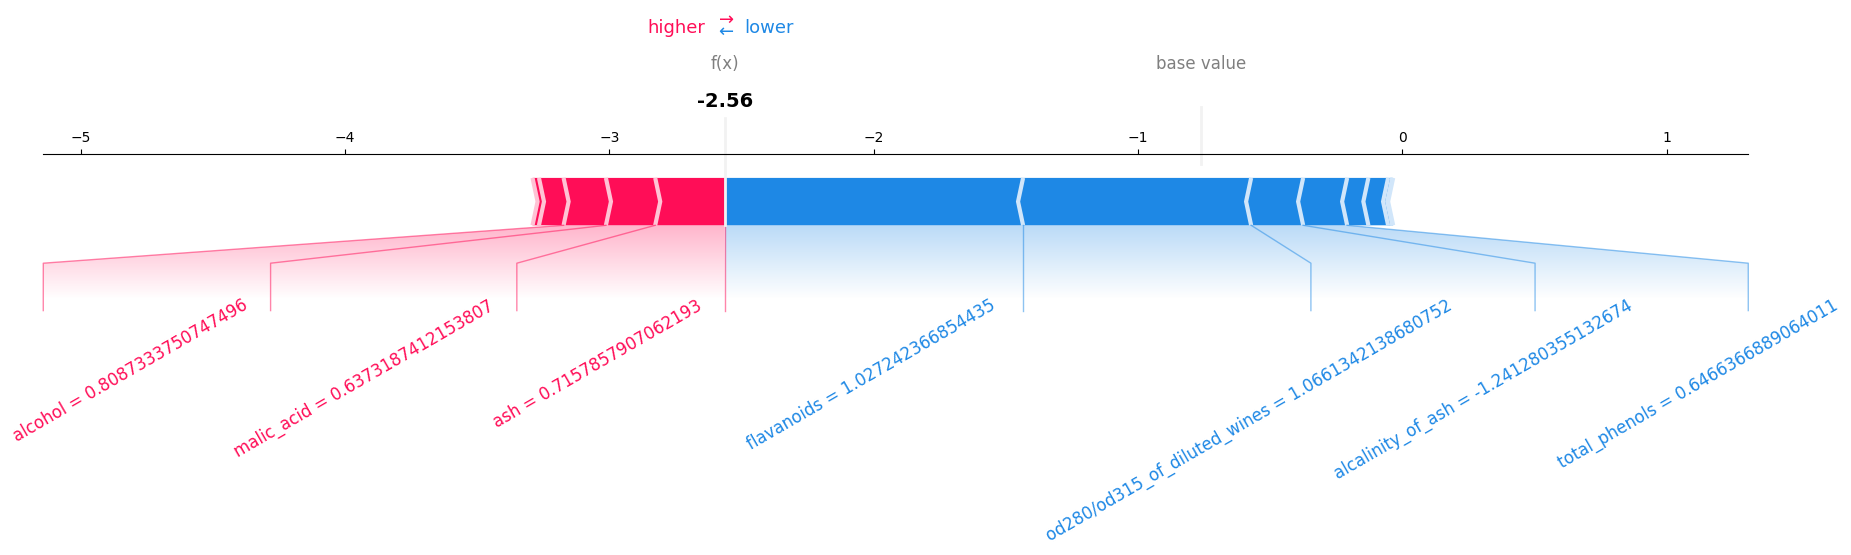

In [24]:
index=0
clase=2
shap.force_plot(explainer.expected_value[clase],
                shap_values.values[index][:,clase], X_test_scaled[index],
                feature_names=feature_names, matplotlib=True, figsize=(22, 4),
                text_rotation=30)